# "Foundations of Computer Science" course (1819-1-F9101Q001)
## Final Project

**Alessandro Vaccarino - 811751**


---

The current project refers to [this provided guideline](https://gdv.github.io/foundationsCS-2018/)

0.   **Common part**


In [0]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [0]:
googleplaystore_url = 'https://raw.githubusercontent.com/gdv/foundationsCS-2018/master/ex-data/project/googleplaystore.csv'
googleplaystore_user_reviews_url = 'https://raw.githubusercontent.com/gdv/foundationsCS-2018/master/ex-data/project/googleplaystore_user_reviews.csv'

In [4]:
googleplaystore_import = pd.read_csv(googleplaystore_url)
googleplaystore_import.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [5]:
googleplaystore_import.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
googleplaystore_user_reviews_import = pd.read_csv(googleplaystore_user_reviews_url)
googleplaystore_user_reviews_import.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


In [7]:
googleplaystore_user_reviews_import.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

With reference to [this](https://elearning.unimib.it/mod/forum/discuss.php?d=72986) eLearning topic, there are Apps duplicated with different attributes (e.g. "Reviews").

I'm assuming "Reviews" column can be a good candidate to detect "golden" row: an higher reviews counter can be associated to a more recent scraping activity.

So, for each "App" column value (assiming App name could be a good primary key candidate), I keep the row with the highest "Reviews" value

Referring to this [link text](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) Pandas documentation page, "duplicated" method by default is set as True except for the first occurrence. 

So, let's use it descending sorting dataframe "Reviews", to have  "False" on the row with the highest value and "True" on the others

In [0]:
googleplaystore_import['Duplicated'] = googleplaystore_import.sort_values(by=['Reviews'], ascending=[False]).duplicated(['App'])

Have a check on 2 examples:

1 - "Farm Heroes Saga"

2 - "Facebook"

In [9]:
googleplaystore_import.loc[googleplaystore_import['App'] == 'Farm Heroes Saga']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Duplicated
1695,Farm Heroes Saga,GAME,4.4,7614130,70M,"100,000,000+",Free,0,Everyone,Casual,"July 26, 2018",5.1.8,2.3 and up,True
1733,Farm Heroes Saga,GAME,4.4,7614271,70M,"100,000,000+",Free,0,Everyone,Casual,"July 26, 2018",5.1.8,2.3 and up,True
1880,Farm Heroes Saga,GAME,4.4,7614415,70M,"100,000,000+",Free,0,Everyone,Casual,"July 26, 2018",5.1.8,2.3 and up,True
2011,Farm Heroes Saga,GAME,4.4,7614407,70M,"100,000,000+",Free,0,Everyone,Casual,"July 26, 2018",5.1.8,2.3 and up,True
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71M,"100,000,000+",Free,0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up,False


In [10]:
googleplaystore_import.loc[googleplaystore_import['App'] == 'Facebook']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Duplicated
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,False
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,True


Ok, test is successful: now I can remove rows with "Duplicated" = True

In [0]:
googleplaystore = googleplaystore_import.loc[googleplaystore_import['Duplicated'] == False].drop(['Duplicated'], axis=1)
googleplaystore_dup = googleplaystore_import.loc[googleplaystore_import['Duplicated'] == True].drop(['Duplicated'], axis=1)

Ok, now "googleplaystore" seems good

Before starting, give a look to googleplaystore_user_reviews_import

In [12]:
googleplaystore_user_reviews_import.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


This table appears to have no primary key (I could have the same review for the same App).

So, we've only to clean table removing "NaN" reviews, focusing on "Translated_Review" column

In [0]:
googleplaystore_user_reviews = googleplaystore_user_reviews_import[~googleplaystore_user_reviews_import['Translated_Review'].isnull()]
googleplaystore_user_reviews_null = googleplaystore_user_reviews_import[googleplaystore_user_reviews_import['Translated_Review'].isnull()]

1.   **Convert the app sizes to a number**

First of all, check values for column "Size", to get a quick data profiling

In [14]:
googleplaystore.groupby('Size').size().reset_index(name='counts')

,Size,counts
0,"1,000+",1
1,1.0M,7
2,1.1M,32
3,1.2M,41
4,1.3M,35
5,1.4M,36
6,1.5M,47
7,1.6M,39
8,1.7M,40
9,1.8M,47


Size = '1,000+' and 'Varies with device'? Maybe there is an issue... Let's give a deeper check:

In [15]:
googleplaystore.loc[googleplaystore['Size'] == '1,000+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [0]:
issuedRowPandasIndex = int(googleplaystore.loc[googleplaystore['Size'] == '1,000+'].index[0])
# "+1" to get effective row number in file
issuedRowNumber = issuedRowPandasIndex + 1

Let's give a check on the original file, to be sure the issue is not caused by a bad file read:

In [0]:
import urllib.request

In [18]:
googleplaystore_file = urllib.request.urlopen(googleplaystore_url)
for i, line in enumerate(googleplaystore_file):
  if i == issuedRowNumber:
    print(line)
  elif i > issuedRowNumber:
    break
googleplaystore_file.close()

b'Life Made WI-Fi Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,,"February 11, 2018",1.0.19,4.0 and up\n'


...Ok, CSV file is completely missing a column (neither a double delimiter ",,")...
It's a single case, so try to fix it manually

In [0]:
googleplaystore.loc[issuedRowPandasIndex,'Android Ver'] = googleplaystore.loc[issuedRowPandasIndex]['Current Ver']
googleplaystore.loc[issuedRowPandasIndex,'Current Ver'] = googleplaystore.loc[issuedRowPandasIndex]['Last Updated']
googleplaystore.loc[issuedRowPandasIndex,'Last Updated'] = googleplaystore.loc[issuedRowPandasIndex]['Genres']
googleplaystore.loc[issuedRowPandasIndex,'Genres'] = googleplaystore.loc[issuedRowPandasIndex]['Content Rating']
googleplaystore.loc[issuedRowPandasIndex,'Content Rating'] = googleplaystore.loc[issuedRowPandasIndex]['Price']
googleplaystore.loc[issuedRowPandasIndex,'Price'] = googleplaystore.loc[issuedRowPandasIndex]['Type']
googleplaystore.loc[issuedRowPandasIndex,'Type'] = googleplaystore.loc[issuedRowPandasIndex]['Installs']
googleplaystore.loc[issuedRowPandasIndex,'Installs'] = googleplaystore.loc[issuedRowPandasIndex]['Size']
googleplaystore.loc[issuedRowPandasIndex,'Size'] = googleplaystore.loc[issuedRowPandasIndex]['Reviews']
googleplaystore.loc[issuedRowPandasIndex,'Reviews'] = googleplaystore.loc[issuedRowPandasIndex]['Rating']
googleplaystore.loc[issuedRowPandasIndex,'Rating'] = googleplaystore.loc[issuedRowPandasIndex]['Category']
googleplaystore.loc[issuedRowPandasIndex,'Category'] = np.NaN

In [20]:
googleplaystore.loc[issuedRowPandasIndex]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [21]:
googleplaystore.groupby('Size').size().reset_index(name='counts')

,Size,counts
0,1.0M,7
1,1.1M,32
2,1.2M,41
3,1.3M,35
4,1.4M,36
5,1.5M,47
6,1.6M,39
7,1.7M,40
8,1.8M,47
9,1.9M,31


In [22]:
googleplaystore.loc[googleplaystore['Size'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
73,PDD-UA,AUTO_AND_VEHICLES,4.8,736,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 29, 2018",2.9,2.3.3 and up
85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 4, 2018",Varies with device,Varies with device
88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 3, 2018",Varies with device,Varies with device
89,Zona Azul Digital Fácil SP CET - OFFICIAL São ...,AUTO_AND_VEHICLES,4.6,7880,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 10, 2018",4.6.5,Varies with device
92,Fuelio: Gas log & costs,AUTO_AND_VEHICLES,4.6,65786,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 2, 2018",Varies with device,4.0.3 and up
102,Mirror - Zoom & Exposure -,BEAUTY,3.9,32090,Varies with device,"1,000,000+",Free,0,Everyone,Beauty,"October 24, 2016",Varies with device,Varies with device


'Varies with device' seems to be actually part of the dataset. I've to deal with it later, during conversion phase

Ok, the issue should be fixed (we'll test is later. Now we can cast *Size* value as a numbert (warning: "Varies with device" value needs to be handled)

In [0]:
size_regex = re.compile(r'(\d+(?:\.\d+)?)\s*([kmgtp])', re.IGNORECASE)

def unitConverter(unit):
    unit = unit.upper()
    if unit in ['K','KB']:
        return 1000
    if unit in ['M','MB']:
        return 1000000
    if unit in ['G','GB']:
        return 1000000000
    if unit in ['T','TB']:
        return 1000000000000
    return 1

def sizeConverter(size):
    m = size_regex.search(size)
    if m == None:
      return np.NaN
    else:
      value = float(m[1])
      unit = int(unitConverter(m[2]))
      return int(value*unit)

Use defined function to create a **new column** with converted size. We're using a new column, to keep original one to make some tests

In [0]:
googleplaystore['SizeNew'] = googleplaystore['Size'].apply(sizeConverter)

In [25]:
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeNew
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800000.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5600000.0


Check for "NaN" values (here we should have "Varies with devices" observations, because regex'll not detect the common expected format)

In [26]:
googleplaystore[googleplaystore['SizeNew'].isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeNew
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,NaN
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,NaN
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,NaN
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,NaN
73,PDD-UA,AUTO_AND_VEHICLES,4.8,736,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 29, 2018",2.9,2.3.3 and up,NaN


In [27]:
googleplaystore[googleplaystore['SizeNew'].isnull()]['Size'].unique()

array(['Varies with device'], dtype=object)

Good, the only **Size** column not converted is *''Varies with device'*, as expected. Now we can replace *Size* column with *SizeNew*


In [28]:
googleplaystore['Size'] = googleplaystore['SizeNew']
googleplaystore = googleplaystore.drop(columns='SizeNew')
googleplaystore.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


2.   **Convert the number of installs to a number**

First of all, check values for column "Installs", to get a quick data profiling

In [29]:
googleplaystore.groupby('Installs').size().reset_index(name='counts')

,Installs,counts
0,0,1
1,0+,14
2,1+,67
3,"1,000+",889
4,"1,000,000+",1418
5,"1,000,000,000+",20
6,10+,385
7,"10,000+",1030
8,"10,000,000+",934
9,100+,710


Quite simple, compared to "Size" column. No need to create a dedicated regex, it just need to replace "+" and ","

In [0]:
def installsConverter(installs):
  return int(installs.replace('+','').replace(',',''))

In [0]:
googleplaystore['Installs'] = googleplaystore['Installs'].apply(installsConverter)

In [32]:
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


Check for "NaN" values (0 awaited, looking to data profile)

In [33]:
googleplaystore[googleplaystore['Installs'].isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Ok, 0 rows affected. Conversion succesfull

3.   **Transform “Varies with device” into a missing value**

In [0]:
def columnCleaner(value):
    # Treat only str columns
    if type(value) is str:
      if value.upper().strip() == 'VARIES WITH DEVICE':
        return np.NaN
      else:
        return value
    else:
       return value

No specific column in the request. Check on all

In [0]:
for column in googleplaystore:
  # We don't need to handle "IntSize" & "IntInstalls" column, already cleaned
  if column not in ['Size','Installs']:
    googleplaystore[column] = googleplaystore[column].apply(columnCleaner)

4.   **Convert Current Ver and Android Ver into a dotted number (e.g. 4.0.3 or 4.2)**

First of all, check values for columns "Current Ver" and "Android Ver", to get a quick data profiling

In [36]:
googleplaystore.groupby('Current Ver').size().reset_index(name='counts')

,Current Ver,counts
0,0.0.0.2,1
1,0.0.1,15
2,0.0.10,1
3,0.0.2,4
4,0.0.3,2
5,0.0.4,3
6,0.0.42,1
7,0.0.44,1
8,0.0.5,3
9,0.0.52,1


In [37]:
googleplaystore.groupby('Android Ver').size().reset_index(name='counts')

,Android Ver,counts
0,1.0 and up,2
1,1.5 and up,20
2,1.6 and up,116
3,2.0 and up,32
4,2.0.1 and up,7
5,2.1 and up,133
6,2.2 - 7.1.1,1
7,2.2 and up,239
8,2.3 and up,617
9,2.3.3 and up,273


In [0]:
currentVer_regex = re.compile(r'(\d?[.\d]+)', re.IGNORECASE)

def versionConverter(currentVer):
  if currentVer == np.NaN or currentVer == None:
    return np.NaN
  elif type(currentVer) is str:
    m = currentVer_regex.findall(currentVer)
    if m == None:
      return np.NaN
    elif len(m) == 0:
      return np.NaN
    else:
      # In case of multiple version, return the first
      # If the version is something like '.2019', then add a '0' head, to have something like '0.2019'
      if m[0][0]=='.':
        return '0' + m[0][0]
      else:
        return m[0]
  else:
     return np.NaN

Use defined function to create a **new column** with converted *'Current Ver'*. We're using a new column, to keep original one to make some tests

In [0]:
googleplaystore['Current Ver New'] = googleplaystore['Current Ver'].apply(versionConverter)

In [40]:
googleplaystore.groupby('Current Ver New').size().reset_index(name='counts')

,Current Ver New,counts
0,0.,6
1,0.0.0.2,1
2,0.0.1,15
3,0.0.10,1
4,0.0.2,4
5,0.0.3,2
6,0.0.4,3
7,0.0.42,1
8,0.0.44,1
9,0.0.5,3


In [41]:
googleplaystore[googleplaystore['Current Ver New'].isnull() & googleplaystore['Current Ver'].notnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Current Ver New
2501,HHS,MEDICAL,NaN,0,4300000.0,500,Free,0,Everyone,Medical,"May 30, 2017",Initial,4.0 and up,NaN
3611,Latest Emmanuella Comedy Video,PARENTING,4.6,60,4900000.0,10000,Free,0,Everyone,Parenting,"April 1, 2018",Natalia Studio Development,4.0.3 and up,NaN
5218,AI Image Recognizer (beta),PHOTOGRAPHY,NaN,0,3700000.0,500,Free,0,Everyone,Photography,"September 13, 2017",closed,4.0 and up,NaN
5289,Ak-47 Wallpapers 2018,PERSONALIZATION,NaN,7,4900000.0,500,Free,0,Everyone,Personalization,"March 14, 2018",newversion,4.3 and up,NaN
5981,BC iptv player,VIDEO_PLAYERS,4.4,8,14000000.0,1000,Free,0,Everyone,Video Players & Editors,"October 12, 2017",Final,4.0 and up,NaN


The only remaining rows are related to "non-standard" values ('Final', 'Initial',...) so it's correct to convert them as NaN
We can now replace *'Current Ver'*

In [42]:
googleplaystore['Current Ver'] = googleplaystore['Current Ver New']
googleplaystore = googleplaystore.drop(columns='Current Ver New')
googleplaystore.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


Use defined function to create a **new column** with converted *'Android Ver'*. We're using a new column, to keep original one to make some tests

In [0]:
googleplaystore['Android Ver New'] = googleplaystore['Android Ver'].apply(versionConverter)

In [44]:
googleplaystore.groupby('Android Ver New').size().reset_index(name='counts')

,Android Ver New,counts
0,1.0,2
1,1.5,20
2,1.6,116
3,2.0,32
4,2.0.1,7
5,2.1,133
6,2.2,240
7,2.3,617
8,2.3.3,273
9,3.0,230


In [45]:
googleplaystore[googleplaystore['Android Ver New'].isnull() & googleplaystore['Android Ver'].notnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Ver New


0 rows are related to unhandled NaN values.
We can now replace *'Andoroid Ver'*

In [46]:
googleplaystore['Android Ver'] = googleplaystore['Android Ver New']
googleplaystore = googleplaystore.drop(columns='Android Ver New')
googleplaystore.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3


5.   **Remove the duplicates**

First of all, check if there are some duplicates

In [47]:
googleplaystore.groupby(googleplaystore.columns.tolist(),as_index=False).size().reset_index(name='counts')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,counts
0,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000.0,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1,1
1,- Free Comics - Comic Apps,COMICS,3.5,115,9100000.0,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0,1
2,.R,TOOLS,4.5,259,203000.0,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5,1
3,/u/app,COMMUNICATION,4.7,573,53000000.0,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1,1
4,058.ba,NEWS_AND_MAGAZINES,4.4,27,14000000.0,100,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2,1
5,1. FC Köln App,SPORTS,4.6,2019,41000000.0,100000,Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4,1
6,10 Best Foods for You,HEALTH_AND_FITNESS,4,2490,3800000.0,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3,1
7,10 Minutes a Day Times Tables,FAMILY,4.1,681,48000000.0,100000,Free,0,Everyone,Education,"July 3, 2014",1.2,2.2,1
8,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3800000.0,100,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1,1
9,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3500000.0,500,Paid,$0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1,1


Ok, we have duplicates. Remove them

In [0]:
googleplaystore = googleplaystore.drop_duplicates(keep='first')

In [49]:
googleplaystore.groupby(googleplaystore.columns.tolist(),as_index=False).size().reset_index(name='counts')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,counts
0,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000.0,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1,1
1,- Free Comics - Comic Apps,COMICS,3.5,115,9100000.0,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0,1
2,.R,TOOLS,4.5,259,203000.0,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5,1
3,/u/app,COMMUNICATION,4.7,573,53000000.0,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1,1
4,058.ba,NEWS_AND_MAGAZINES,4.4,27,14000000.0,100,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2,1
5,1. FC Köln App,SPORTS,4.6,2019,41000000.0,100000,Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4,1
6,10 Best Foods for You,HEALTH_AND_FITNESS,4,2490,3800000.0,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3,1
7,10 Minutes a Day Times Tables,FAMILY,4.1,681,48000000.0,100000,Free,0,Everyone,Education,"July 3, 2014",1.2,2.2,1
8,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3800000.0,100,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1,1
9,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3500000.0,500,Paid,$0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1,1


6.   **For each category, compute the number of apps**

In [50]:
googleplaystore.groupby(['Category']).size().sort_values(ascending=False).reset_index(name='Numbers of Apps')

,Category,Numbers of Apps
0,FAMILY,1879
1,GAME,942
2,TOOLS,828
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


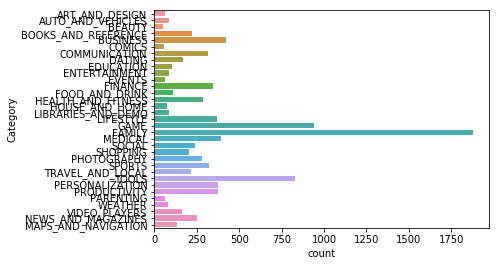

In [51]:
sns.countplot(y=googleplaystore['Category']);

7.   **For each category, compute the average rating**

In [52]:
googleplaystore.groupby('Rating').size().reset_index(name='counts')

,Rating,counts
0,1,16
1,1.2,1
2,1.4,3
3,1.5,3
4,1.6,4
5,1.7,8
6,1.8,8
7,1.9,11
8,2,12
9,2.1,8


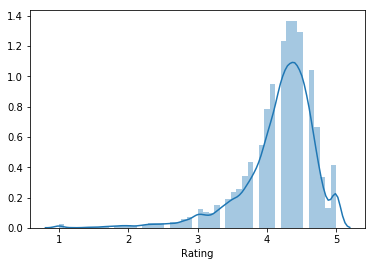

In [53]:
sns.distplot(pd.to_numeric(googleplaystore['Rating']).dropna());

First of all, convert "Rating" to a float

In [0]:
def ratingConverter(rating):
  return float(rating)

In [0]:
googleplaystore['Rating'] = googleplaystore['Rating'].apply(ratingConverter)

In [56]:
googleplaystore.groupby(['Category'])['Rating'].mean().sort_values(ascending=False).reset_index(name='Average Rating')

,Category,Average Rating
0,EVENTS,4.435556
1,ART_AND_DESIGN,4.359322
2,EDUCATION,4.353333
3,BOOKS_AND_REFERENCE,4.344970
4,PERSONALIZATION,4.332215
5,PARENTING,4.300000
6,BEAUTY,4.278571
7,SOCIAL,4.247291
8,GAME,4.243352
9,WEATHER,4.243056


8.   **Create two dataframes: one for the genres and one bridging apps and genres. So that, for instance, the app *Pixel Draw - Number Art Coloring Book* appears twice in the bridging table, once for *Art & Design*, once for *Creativity***

In [57]:
googleplaystore.groupby('Genres').size().reset_index(name='counts')

,Genres,counts
0,Action,299
1,Action;Action & Adventure,12
2,Adventure,73
3,Adventure;Action & Adventure,5
4,Adventure;Brain Games,1
5,Adventure;Education,1
6,Arcade,184
7,Arcade;Action & Adventure,14
8,Arcade;Pretend Play,1
9,Art & Design,57


Looking at the data profiling phase, genres are splitted by ";".
So, first of all, unwind DataFrame for "Genres" values (splitted by ";")

In [58]:
unwindedGenres = pd.DataFrame(googleplaystore.Genres.str.split(';', expand=True).stack().str.strip().reset_index(level=1, drop=True))
unwindedGenres.columns = ['Genres']

distinctGenres = pd.DataFrame(unwindedGenres['Genres'].unique())
distinctGenres.head()

,0
0,Art & Design
1,Creativity
2,Auto & Vehicles
3,Beauty
4,Books & Reference


In [59]:
bridgeDataFrame = googleplaystore.drop(['Genres'], axis=1).join(unwindedGenres).reset_index(drop=True)
bridgeDataFrame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3,Art & Design
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,"June 8, 2018",NaN,4.2,Art & Design
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,"June 20, 2018",1.1,4.4,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,"June 20, 2018",1.1,4.4,Creativity


Check provided example

In [60]:
bridgeDataFrame.loc[bridgeDataFrame['App'] == 'Pixel Draw - Number Art Coloring Book']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,"June 20, 2018",1.1,4.4,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,"June 20, 2018",1.1,4.4,Creativity


Ok, seems good!

9.   **For each genre, create a new column of the original dataframe. The new columns must have boolean values (True if the app has a given genre)**

In [0]:
pivotted_genres = bridgeDataFrame[['App','Genres']].pivot_table(
    index=['App'],
		columns=['Genres'],
		aggfunc=lambda x: True).fillna(False).reset_index()

Check an example with 2 genres

In [62]:
bridgeDataFrame.loc[bridgeDataFrame['App'] == 'Pixel Draw - Number Art Coloring Book']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,"June 20, 2018",1.1,4.4,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,"June 20, 2018",1.1,4.4,Creativity


In [63]:
pd.set_option('display.max_columns', None)
pivotted_genres.loc[pivotted_genres['App'] == 'Pixel Draw - Number Art Coloring Book']

Genres,App,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,Business,Card,Casino,Casual,Comics,Communication,Creativity,Dating,Education,Educational,Entertainment,Events,Finance,Food & Drink,Health & Fitness,House & Home,Libraries & Demo,Lifestyle,Maps & Navigation,Medical,Music,Music & Audio,Music & Video,News & Magazines,Parenting,Personalization,Photography,Pretend Play,Productivity,Puzzle,Racing,Role Playing,Shopping,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
7022,Pixel Draw - Number Art Coloring Book,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Seems good!

10.   **For each genre, compute the average rating. What is the genre with highest average?**

In [64]:
bridgeDataFrame.groupby(['Genres'])['Rating'].mean().sort_values(ascending=False).reset_index(name='Average Rating')

,Genres,Average Rating
0,Events,4.435556
1,Puzzle,4.370968
2,Brain Games,4.358462
3,Art & Design,4.350000
4,Books & Reference,4.343275
5,Personalization,4.332215
6,Word,4.318182
7,Creativity,4.306250
8,Parenting,4.300000
9,Music & Audio,4.300000


Answer to the question: **"*Events*" is the genre with the highest rating (*4.435556*)**

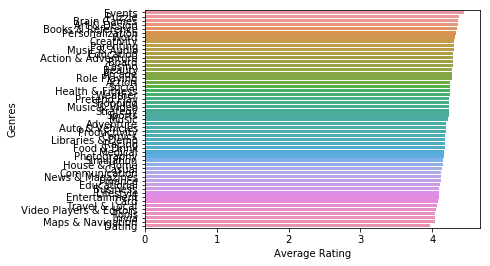

In [65]:
plotdataset = bridgeDataFrame.groupby(['Genres'])['Rating'].mean().sort_values(ascending=False).reset_index(name='Average Rating')
sns.barplot(y=plotdataset['Genres'],x=plotdataset['Average Rating']);

11.   **For each app, compute the approximate income, obtain as a product of number of installs and price.**

In [66]:
googleplaystore.groupby('Price').size().reset_index(name='counts')

,Price,counts
0,$0.99,145
1,$1.00,3
2,$1.04,1
3,$1.20,1
4,$1.26,1
5,$1.29,1
6,$1.49,46
7,$1.50,1
8,$1.59,1
9,$1.61,1


Format "Price" column as a float

In [0]:
currentPrice_regex = re.compile(r'(\d?[.\d]+)', re.IGNORECASE)

def priceConverter(currentPrice):
  if currentPrice == np.NaN or currentPrice == None:
    return np.NaN
  elif type(currentPrice) is str:
    m = currentPrice_regex.findall(currentPrice)
    if m == None:
      return np.NaN
    elif len(m) == 0:
      return np.NaN
    else:
      # In case of multiple prices, return the first
      return float(m[0])
  else:
     return np.NaN

Use defined function to create a **new column** with converted price. We're using a new column, to keep original one to make some tests

In [0]:
googleplaystore['Price New'] = googleplaystore['Price'].apply(priceConverter)

In [69]:
googleplaystore[googleplaystore['Price New'].isnull()]['Price'].unique()

array([], dtype=object)

0 rows are related to unhandled NaN values.
We can now replace *'Price'*

In [70]:
googleplaystore['Price'] = googleplaystore['Price New']
googleplaystore = googleplaystore.drop(columns='Price New')
googleplaystore.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3


In [71]:
googleplaystore['Income'] = googleplaystore['Price'] * googleplaystore['Installs']

# Get some examples
googleplaystore.loc[googleplaystore['Price'] > 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0,499000.00
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0,499000.00
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1,399000.00
477,Calculator,DATING,2.6,57,6200000.0,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0,6990.00
478,Truth or Dare Pro,DATING,NaN,0,20000000.0,50,Paid,1.49,Teen,Dating,"September 1, 2017",1.0,4.0,74.50
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,18000.0,100,Paid,2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0,299.00
480,Ad Blocker for SayHi,DATING,NaN,4,1200000.0,100,Paid,3.99,Teen,Dating,"August 2, 2018",1.2,4.0.3,399.00
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17000000.0,100,Paid,7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0,799.00
571,"Moco+ - Chat, Meet People",DATING,4.2,1546,NaN,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1,39900.00
851,Sago Mini Hat Maker,EDUCATION,4.9,11,63000000.0,1000,Paid,3.99,Everyone,Education;Pretend Play,"July 24, 2017",1.0,4.0.3,3990.00


12.   **For each app, compute its minimum and maximum `Sentiment_polarity`**

In [73]:
googleplaystore_user_reviews.groupby('Sentiment_Polarity').size().reset_index(name='counts')

,Sentiment_Polarity,counts
0,-1.000000,234
1,-0.988281,2
2,-0.976562,1
3,-0.955000,1
4,-0.937500,5
5,-0.933333,1
6,-0.910000,28
7,-0.900000,15
8,-0.900000,1
9,-0.892857,2


We can use *googleplaystore_user_reviews* DataFrame for this analysis, converting *Sentiment_Polarity* in float

In [0]:
def sentimentPolarityConverter(sentimentPolarity):
  return float(sentimentPolarity)

In [75]:
googleplaystore_user_reviews['Sentiment_Polarity'] = googleplaystore_user_reviews['Sentiment_Polarity'].apply(sentimentPolarityConverter)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
googleplaystore_user_reviews.groupby(['App']).agg({'Sentiment_Polarity': [min, max]})

Sentiment_Polarity  \
                                                                  min   
App                                                                     
10 Best Foods for You                                       -0.800000   
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                            -0.112500   
11st                                                        -1.000000   
1800 Contacts - Lens Store                                  -0.300000   
1LINE – One Line with One Touch                             -0.825000   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif            -0.800000   
21-Day Meditation Experience                                -0.265625   
2Date Dating App, Love and matching                         -0.645833   
2GIS: directory & navigator                                 -0.375000   
2RedBeans                                                   -0.800000   
2ndLine - Second Phone Number                               -0.781250   
30 Day Fitness Challenge - Workout at Home                  -0.500000   
365Scores - Live Scores                                      0.000000   
3D Live Neon Weed Launcher                                   0.136364   
4 in a Row                                                  -0.800000   
4K Wallpapers and Ultra HD Backgrounds                      -0.700000   
591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢          -0.300000   
591房屋交易-香港                                                  -0.077083   
7 Cups: Anxiety & Stress Chat                               -0.172222   
7 Day Food Journal Challenge                                 0.070000   
7 Minute Workout                                            -0.291667   
7 Weeks - Habit & Goal Tracker                              -0.132576   
8 Ball Pool                                                 -1.000000   
850 Sports News Digest                                      -0.500000   
8fit Workouts & Meal Planner                                -0.700000   
95Live -SG#1 Live Streaming App                             -0.937500   
A Call From Santa Claus!                                    -1.000000   
A Word A Day                                                 0.000000   
A&E - Watch Full Episodes of TV Shows                       -0.166667   
A+ Gallery - Photos & Videos                                -1.000000   
...                                                               ...   
HipChat - Chat Built for Teams                              -0.722222   
Hipmunk Hotels & Flights                                    -0.166667   
Hitwe - meet people and chat                                -0.500000   
Hole19: Golf GPS App, Rangefinder & Scorecard                0.000000   
Home Decor Showpiece Art making: Medium Difficulty          -1.000000   
Home Scouting® MLS Mobile                                   -0.800000   
Home Security Camera WardenCam - reuse old phones           -0.800000   
Home Street – Home Design Game                              -0.750000   
Home Workout - No Equipment                                 -0.016667   
Home Workout for Men - Bodybuilding                          0.000000   
Home workouts - fat burning, abs, legs, arms,chest           0.050000   
HomeWork                                                     1.000000   
Homes.com 🏠 For Sale, Rent                                  -0.600000   
Homescapes                                                  -0.197917   
Homesnap Real Estate & Rentals                              -0.600000   
Homestyler Interior Design & Decorating Ideas               -0.400000   
Homework Planner                                            -0.208333   
Honkai Impact 3rd                                           -0.237500   
Hopper - Watch & Book Flights                               -0.937500   
Horoscopes – Daily Zodiac Horoscope and Astrology           -0.040476   
Horses Live Wallpaper                                       -0.656250   
Hostelworld: Hostels & Cheap Hotels 